# OOP design for a simple heuristic solver for Frasers Capstone project

Author: Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

Version: v1.0 (10/06/2021)

A simple "evolutionary" algorithm demo for the Y2021 Capstone Frasers students.

### Imports and requirements

In [1]:
# Core packages
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

# Custom packages
# - GJK is used to check collisions between polygons (Source: https://github.com/Wopple/GJK)
import gjk

### Playing with building shapes

Defining a Shape superclass and a Rectangular_Shape child class.

In [2]:
# Shape superclass
class Shape():
    
    def __init__(self, x_pos, y_pos, theta = np.pi/2):
        """
        Constructor method for Shape objects.
        """
        
        # Initialize positions
        self._x_pos = x_pos
        self._y_pos = y_pos
        self._theta = theta % (2*np.pi)
        self._corners_list = []
        
        
    def check_intersect(self, other):
        """
        Check for collision between polygons
        """
        return gjk.collidePolyPoly(tuple(self._corners_list), tuple(other._corners_list))
    
    
    """
    Property for x_pos
    """
    def set_x_pos(self, pos):
        self._x_pos = pos
    def get_x_pos(self):
        return self._x_pos
    x_pos = property(get_x_pos, set_x_pos)

    
    """
    Property for y_pos
    """
    def set_y_pos(self, pos):
        self._y_pos = pos
    def get_y_pos(self):
        return self._y_pos
    y_pos = property(get_y_pos, set_y_pos)

    
    """
    Property for theta
    """
    def set_theta(self, theta):
        self._theta = theta
    def get_theta(self):
        return self._theta
    theta = property(get_theta, set_theta)

In [3]:
# Ractangular_Shape child class
class Rectangular_Shape(Shape):
    
    def __init__(self, x_pos, y_pos, length, width, theta = np.pi/2):
        """
        Constructor method for Rectangular_Shape objects.
        """
        
        # Initialize with motherclass
        self._type = "Rectangular"
        super().__init__(x_pos, y_pos, theta)
        
        # Initialize dimensions
        if length < width:
            length, width = width, length
        self._length = length
        self._width = width
        
        # Update corners
        self.update_corners_list()
    
    
    def update_corners_list(self):
        """
        Update method for corners list.
        """
        
        # Diagonal value and arctan value
        d = np.sqrt((self.width/2)**2 + (self.length/2)**2)
        t = np.arctan(self.length/self.width)
        
        # Corner 1
        theta1 = (t + self.theta) % (2*np.pi)
        x1 = round(self.x_pos + d*np.cos(theta1), 5)
        y1 = round(self.y_pos + d*np.sin(theta1), 5)

        # Corner 2
        theta2 = (-t + self.theta) % (2*np.pi)
        x2 = round(self.x_pos + d*np.cos(theta2), 5)
        y2 = round(self.y_pos + d*np.sin(theta2), 5)

        # Corner 3
        theta3 = (t + self.theta - np.pi) % (2*np.pi)
        x3 = round(self.x_pos + d*np.cos(theta3), 5)
        y3 = round(self.y_pos + d*np.sin(theta3), 5)

        # Corner 4
        theta4 = (-t + self.theta - np.pi) % (2*np.pi)
        x4 = round(self.x_pos + d*np.cos(theta4), 5)
        y4 = round(self.y_pos + d*np.sin(theta4), 5)

        # Assemble
        self._corners_list = [(x1, y1), (x2, y2), (x3, y3), (x4, y4)]
        
        
    """
    Property for length
    """
    def set_length(self, length):
        self._length = length
    def get_length(self):
        return self._length
    length = property(get_length, set_length)

    
    """
    Property for width
    """
    def set_width(self, width):
        self._width = width
    def get_width(self):
        return self._width
    width = property(get_width, set_width)

In [4]:
# Check the collision happens
b1 = Rectangular_Shape(0, 0, 20, 10, np.pi/2)
print(b1.__dict__)
b2 = Rectangular_Shape(0, 0, 20, 10, 0)
print(b2.__dict__)
print(b1.check_intersect(b2))

{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 1.5707963267948966, '_corners_list': [(-10.0, 5.0), (10.0, 5.0), (10.0, -5.0), (-10.0, -5.0)], '_length': 20, '_width': 10}
{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 0.0, '_corners_list': [(5.0, 10.0), (5.0, -10.0), (-5.0, -10.0), (-5.0, 10.0)], '_length': 20, '_width': 10}
True


In [5]:
# Check for no collision
b1 = Rectangular_Shape(0, 0, 20, 10, np.pi/2)
print(b1.__dict__)
b2 = Rectangular_Shape(20, 50, 20, 10, 0)
print(b2.__dict__)
print(b1.check_intersect(b2))

{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 1.5707963267948966, '_corners_list': [(-10.0, 5.0), (10.0, 5.0), (10.0, -5.0), (-10.0, -5.0)], '_length': 20, '_width': 10}
{'_type': 'Rectangular', '_x_pos': 20, '_y_pos': 50, '_theta': 0.0, '_corners_list': [(25.0, 60.0), (25.0, 40.0), (15.0, 40.0), (15.0, 60.0)], '_length': 20, '_width': 10}
False


### 

### Defining the Rectangular Environment class (only acceptable one for now)

In [6]:
# Rectangular environment class, as a Rectangular_Shape sublass
class Rectangular_Environment(Rectangular_Shape):
    
    def __init__(self, x_pos, y_pos, length, width):
        """
        Constructor method for Rectangular_Environment objects.
        """
        
        # Initialize Environment as Rectangular
        super().__init__(x_pos, y_pos, length, width)
        
        # Define list of buildings as empty for now
        self.buildings_list = []
        
        # Define solver and performance criterion for current environment, set as None for now
        self.solver = None
        self.valid = False
        self.perf = None
        
        
    def add_building(self, building):
        """
        Add building method (no remove building method yet)
        """
        
        self.buildings_list.append(building)
        
    def add_solver(self, solver):
        """
        Add solver to environment (after environment has been initialized).
        """
        
        self.solver = solver
    
    
    def run_solver(self):
        """
        Run solver and get suggested design
        """
        
        self.valid, self.perf, self.buildings_list = self.solver.run()
        print("Final: ", [(b.x_pos, b.y_pos) for b in self.buildings_list])
        
    def display_environment(self):
        # Initialize figure
        plt.figure()

        # Display environment (blue)
        coords_env = self._corners_list + [self._corners_list[0]]
        env_x_coords = [coord[0] for coord in coords_env]
        env_y_coords = [coord[1] for coord in coords_env]
        plt.plot(env_x_coords, env_y_coords)

        # Display buildings (in red)
        for index, b in enumerate(self.buildings_list):
            coords_b = b._corners_list + [b._corners_list[0]]
            b_x_coords = [coord[0] for coord in coords_b]
            b_y_coords = [coord[1] for coord in coords_b]
            plt.plot(b_x_coords, b_y_coords, color = "red")
        
        # Display
        title_str = "Showing current best candidate "
        title_str += "found by {}.\n".format(self.solver.solver_name)
        title_str += "(Valid: {}, Perf: {})".format(self.valid, self.perf)
        plt.title(title_str)
        #plt.show()

In [7]:
e = Rectangular_Environment(0, 0, 100, 50)
b1 = Rectangular_Shape(-39, -19, 20, 10, np.pi/2)
e.add_building(b1)
b2 = Rectangular_Shape(-34, 9, 30, 10, 0)
e.add_building(b2)
b3 = Rectangular_Shape(25, 11, 25, 15, 0)
e.add_building(b3)
print(e.__dict__)

{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 1.5707963267948966, '_corners_list': [(-50.0, 25.0), (50.0, 25.0), (50.0, -25.0), (-50.0, -25.0)], '_length': 100, '_width': 50, 'buildings_list': [<__main__.Rectangular_Shape object at 0x000001818A758100>, <__main__.Rectangular_Shape object at 0x000001818A758610>, <__main__.Rectangular_Shape object at 0x000001818A74C250>], 'solver': None, 'valid': False, 'perf': None}


### A first solver: random movements of centers for rectangles

This first solver attempts to move buildings in the rectangular environment (keeping them in!), and brings them closer together. The objective is to minimize the distance between the centroids of the buildings (sum over all the possible pairs of buildings).

It will do so by moving the buildings centroids randomly in space (our mutation process to create a new candidate), and will only accept a new candidate if and only if it satisfies two conditions:
- the buildings are still in the rectangular environment (constraint satisfied),
- the buildings are closer together than the previous design (improvement on objective/performance function).

In [8]:
# Solver superclass
class Solver():
    
    def __init__(self, environment, solver_name = "Solver"):
        """
        Constructor method for Solver objects.
        """
        
        # Just a solver name attribute for now
        self.solver_name = solver_name

In [9]:
# Random_Movement_Solver child class
class Random_Movement_Solver(Solver):
    
    def __init__(self, environment, iterations = 1000):
        """
        Constructor method for Random_Movement_Solver objects.
        """
        
        # Reuse superclass
        super().__init__(environment, solver_name = "Random Movement Solver")
        
        # Initialize number of iterations
        self.iterations = iterations
        
        # Retrieve buildings list
        self.buildings_list = deepcopy(environment.buildings_list)
        
        # Retrieve environment shape
        self.environment_shape = deepcopy(environment._corners_list)
        
        # Retrieve environment size for mutation scheduler in mutate_building()
        # and random_step() methods
        # NOTE: Will only work with Rectangular_Shape environments.
        self.environment_size = environment.length
        
        # Initialize performance and validity criterions
        self.valid = self.check_validity(buildings_list = self.buildings_list)
        if self.valid:
            self.perf = self.perf_criterion(buildings_list = self.buildings_list)
        else:
            self.perf = np.inf
        
    
    def check_for_collisions_buildings(self, buildings_list):
        """
        Check for collisions between buildings in buildings_list.
        """
        
        # Compute number of buildings
        buildings_number = len(buildings_list)
        
        # Check for collision between all pairs of buildings
        for b1_index in range(buildings_number):
            b1 = buildings_list[b1_index]
            for b2_index in range(b1_index + 1, buildings_number):
                b2 = buildings_list[b2_index]
                intersect = b1.check_intersect(b2)
                if intersect:
                    return True
        return False
    
    
    def check_for_collisions_env(self, buildings_list):
        """
        Check for collisions between buildings in buildings_list and environment.
        NOTE: Will only work with Rectangular_Shape environments.
        """
        
        # Find env_min_x, env_max_x, env_min_y, env_max_y
        if not all([hasattr(self, "env_min_x"), hasattr(self, "env_max_x"), \
                    hasattr(self, "env_min_y"), hasattr(self, "env_max_y")]):
            self.env_min_x = min([coord[0] for coord in self.environment_shape])
            self.env_max_x = max([coord[0] for coord in self.environment_shape])
            self.env_min_y = min([coord[1] for coord in self.environment_shape])
            self.env_max_y = max([coord[1] for coord in self.environment_shape])
        
        for b in buildings_list:
            for coord in b._corners_list:
                x, y = coord
                if any([x < self.env_min_x, x > self.env_max_x, y < self.env_min_y, y > self.env_max_y]):
                    return True
        return False
        
        
    def check_validity(self, buildings_list):
        """
        Check for validity of current layout in buildings_list.
        NOTE: Will only work with Rectangular_Shape environments.
        """
        
        check1 = not self.check_for_collisions_buildings(buildings_list = buildings_list)
        check2 = not self.check_for_collisions_env(buildings_list = buildings_list)
        return check1 and check2
    
    
    def mutate_building(self, b, iter_num):
        """
        Mutate building by moving its centroid randomly in space
        It choose direction and step randomly with uniform distribution.
        """
        
        # Random angle
        random_angle = 2*np.pi*np.random.random()
        
        # Random step value (follows a scheduler based on iterations)
        random_step = self.random_step(iter_num)
        
        # Adjust centroid coordinates for building
        b.x_pos = b.x_pos + random_step*np.cos(random_angle)
        b.y_pos = b.y_pos + random_step*np.sin(random_angle)
        
        # Update corners list
        b.update_corners_list()
        
        return b
        
    
    def random_step(self, iter_num):
        """
        Random step calculator for mutation, includes simple decay.
        """
        
        # Define max stepdecay_rate
        decay_rate = int(self.iterations/5)
        power = iter_num // decay_rate
        max_step = self.environment_size/(2**power)
        random_step = max_step*np.random.random()
        return random_step
    
    
    def perf_criterion(self, buildings_list):
        """
        Performance criterion will be the sum of distances between the centroids of the three buildings.
        
        NOTE: this only works with three buildings in the environment,
        to be replaced with general formula for area of polygons?
        Or another performance criterion.
        """
        
        A = np.array((buildings_list[0].x_pos, buildings_list[0].y_pos))
        B = np.array((buildings_list[1].x_pos, buildings_list[1].y_pos))
        C = np.array((buildings_list[2].x_pos, buildings_list[2].y_pos))
        a = np.linalg.norm(A - B)
        b = np.linalg.norm(B - C)
        c = np.linalg.norm(A - C)
        
        # Previous version was using Heron's formula
        #s = (a+b+c)/2
        #val = np.sqrt(s*(s-a)*(s-b)*(s-c)) # Unstable formula
        #l = [a,b,c]
        #l.sort()
        #a, b, c = l[0], l[1], l[2]
        #val = 1/4*np.sqrt((a+b+c)*(c-a+b)*(c+a-b)*(a+b-c)) # v2, still unstable
        
        val = a + b + c
        return val
    
        
    def run(self):
        """
        Run the solver by performing iterations until the maximal number of iterations is reached.
        NOTE: The current solver design:
        - will mutate all buildings if no valid design has been found yet,
        - will mutate only one building at a time if a valid design has been found,
        - will mutate building by moving their centroid, but not rotate them,
        - will accept a mutation as the new best candidate if it is a valid design (in terms and constraints)
        and it performs better than the previous best candidate in terms of objective/performance function.
        """
        
        for iter_num in range(self.iterations):
            
            # Display
            print("---")
            print("Iteration: ", iter_num)
            print("Current coords: ", [(b.x_pos, b.y_pos) for b in self.buildings_list])
            print("Current validity: ", self.valid)
            print("Current perf: ", self.perf)
            
            # Mutate (all buildings if invalid design is current candidate,
            # only one building otherwise)
            buildings_list_new = deepcopy(self.buildings_list)
            if not self.valid:
                for b in buildings_list_new:
                    b = self.mutate_building(b, iter_num)
            else:
                b = np.random.choice(buildings_list_new)
                b = self.mutate_building(b, iter_num)
                
            # Display
            print("Proposed mutation: ", [(b.x_pos, b.y_pos) for b in buildings_list_new])
            
            # Check for validity and compute perf criterion if needed.
            # Update best candidate if improvement
            new_valid = self.check_validity(buildings_list = buildings_list_new)
            if not new_valid:
                print("New design is invalid.")
                continue
            elif not self.valid:
                self.buildings_list = buildings_list_new
                new_perf = self.perf_criterion(self.buildings_list)
                self.perf = new_perf
                print("Accepted mutation, first valid design.")
            else:
                new_perf = self.perf_criterion(buildings_list_new)
                if new_perf < self.perf:
                    self.perf = new_perf
                    self.buildings_list = buildings_list_new
                    print("Accepted mutation, found a better valid design.")
                else:
                    print("Rejected mutation, proposed design was valid but not better.")
                    
            
        return self.valid, self.perf, self.buildings_list

In [10]:
rms = Random_Movement_Solver(e)
print(rms.__dict__)

{'solver_name': 'Random Movement Solver', 'iterations': 1000, 'buildings_list': [<__main__.Rectangular_Shape object at 0x000001818A79EB20>, <__main__.Rectangular_Shape object at 0x000001818A79EA90>, <__main__.Rectangular_Shape object at 0x000001818A79E6A0>], 'environment_shape': [(-50.0, 25.0), (50.0, 25.0), (50.0, -25.0), (-50.0, -25.0)], 'environment_size': 100, 'env_min_x': -50.0, 'env_max_x': 50.0, 'env_min_y': -25.0, 'env_max_y': 25.0, 'valid': True, 'perf': 158.15920206752673}


In [11]:
rms.run()

---
Iteration:  0
Current coords:  [(-39, -19), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  158.15920206752673
Proposed mutation:  [(-39, -19), (-34, 9), (-61.91632794325672, -2.4942304510242774)]
New design is invalid.
---
Iteration:  1
Current coords:  [(-39, -19), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  158.15920206752673
Proposed mutation:  [(32.97425020037119, -41.9657238296854), (-34, 9), (25, 11)]
New design is invalid.
---
Iteration:  2
Current coords:  [(-39, -19), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  158.15920206752673
Proposed mutation:  [(-39, -19), (-86.32622031684103, -60.74762109140319), (25, 11)]
New design is invalid.
---
Iteration:  3
Current coords:  [(-39, -19), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  158.15920206752673
Proposed mutation:  [(-39, -19), (-34, 9), (6.246020065372722, -65.91805808219699)]
New design is invalid.
---
Iteration:  4
Current coords:  [(-39, -19), (-34, 9), (25, 11)]


Current perf:  118.07294919106381
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-34, 9), (42.091898304410144, 7.853621225896684)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  35
Current coords:  [(-4.362800628957615, 9.613700174824576), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  118.07294919106381
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-30.699871041604435, 72.83836712447803), (25, 11)]
New design is invalid.
---
Iteration:  36
Current coords:  [(-4.362800628957615, 9.613700174824576), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  118.07294919106381
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-34, 9), (37.30641372588235, -6.081112961066388)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  37
Current coords:  [(-4.362800628957615, 9.613700174824576), (-34, 9), (25, 11)]
Current validity:  True
Current perf:  118.07294919106381
Proposed muta

Current coords:  [(-4.362800628957615, 9.613700174824576), (-34, 9), (13.722769878554814, 10.597237602730594)]
Current validity:  True
Current perf:  95.50533844870392
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-89.1310840806839, -25.1716291501005), (13.722769878554814, 10.597237602730594)]
New design is invalid.
---
Iteration:  75
Current coords:  [(-4.362800628957615, 9.613700174824576), (-34, 9), (13.722769878554814, 10.597237602730594)]
Current validity:  True
Current perf:  95.50533844870392
Proposed mutation:  [(-8.023296709868093, 16.109658248478933), (-34, 9), (13.722769878554814, 10.597237602730594)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  76
Current coords:  [(-4.362800628957615, 9.613700174824576), (-34, 9), (13.722769878554814, 10.597237602730594)]
Current validity:  True
Current perf:  95.50533844870392
Proposed mutation:  [(-73.18908310911016, 29.856457174303475), (-34, 9), (13.722769878554814, 10.597237602730594)]


---
Iteration:  110
Current coords:  [(-4.362800628957615, 9.613700174824576), (-34, 9), (13.722769878554814, 10.597237602730594)]
Current validity:  True
Current perf:  95.50533844870392
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-35.977874363197444, 14.186261810791366), (13.722769878554814, 10.597237602730594)]
New design is invalid.
---
Iteration:  111
Current coords:  [(-4.362800628957615, 9.613700174824576), (-34, 9), (13.722769878554814, 10.597237602730594)]
Current validity:  True
Current perf:  95.50533844870392
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-34, 9), (14.973069438062753, 64.09086150611721)]
New design is invalid.
---
Iteration:  112
Current coords:  [(-4.362800628957615, 9.613700174824576), (-34, 9), (13.722769878554814, 10.597237602730594)]
Current validity:  True
Current perf:  95.50533844870392
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-34, 9), (11.652345861741749, 28.509934154462133)]
New design is in

Iteration:  169
Current coords:  [(-4.362800628957615, 9.613700174824576), (-28.956575620029994, 7.392347316648633), (13.722769878554814, 10.597237602730594)]
Current validity:  True
Current perf:  85.6056914454021
Proposed mutation:  [(67.82809388903131, -20.01156785465747), (-28.956575620029994, 7.392347316648633), (13.722769878554814, 10.597237602730594)]
New design is invalid.
---
Iteration:  170
Current coords:  [(-4.362800628957615, 9.613700174824576), (-28.956575620029994, 7.392347316648633), (13.722769878554814, 10.597237602730594)]
Current validity:  True
Current perf:  85.6056914454021
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-57.38777363697277, 29.18871163113038), (13.722769878554814, 10.597237602730594)]
New design is invalid.
---
Iteration:  171
Current coords:  [(-4.362800628957615, 9.613700174824576), (-28.956575620029994, 7.392347316648633), (13.722769878554814, 10.597237602730594)]
Current validity:  True
Current perf:  85.6056914454021
Proposed m

Proposed mutation:  [(6.478352454385025, 23.841793236404506), (-24.290421881042665, 6.613174980694555), (-7.239553860966414, -9.399078761103251)]
New design is invalid.
---
Iteration:  215
Current coords:  [(-4.362800628957615, 9.613700174824576), (-24.290421881042665, 6.613174980694555), (-7.239553860966414, -9.399078761103251)]
Current validity:  True
Current perf:  62.772124132153564
Proposed mutation:  [(11.251744139409974, 25.215744999506843), (-24.290421881042665, 6.613174980694555), (-7.239553860966414, -9.399078761103251)]
New design is invalid.
---
Iteration:  216
Current coords:  [(-4.362800628957615, 9.613700174824576), (-24.290421881042665, 6.613174980694555), (-7.239553860966414, -9.399078761103251)]
Current validity:  True
Current perf:  62.772124132153564
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-24.290421881042665, 6.613174980694555), (24.407657280098757, 27.992821092329326)]
New design is invalid.
---
Iteration:  217
Current coords:  [(-4.36280062

Rejected mutation, proposed design was valid but not better.
---
Iteration:  247
Current coords:  [(-4.362800628957615, 9.613700174824576), (-24.290421881042665, 6.613174980694555), (-7.239553860966414, -9.399078761103251)]
Current validity:  True
Current perf:  62.772124132153564
Proposed mutation:  [(6.965637814660482, -38.85611135780904), (-24.290421881042665, 6.613174980694555), (-7.239553860966414, -9.399078761103251)]
New design is invalid.
---
Iteration:  248
Current coords:  [(-4.362800628957615, 9.613700174824576), (-24.290421881042665, 6.613174980694555), (-7.239553860966414, -9.399078761103251)]
Current validity:  True
Current perf:  62.772124132153564
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-41.76291860306252, -6.209014853324322), (-7.239553860966414, -9.399078761103251)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  249
Current coords:  [(-4.362800628957615, 9.613700174824576), (-24.290421881042665, 6.613174980694555), 

New design is invalid.
---
Iteration:  301
Current coords:  [(-4.362800628957615, 9.613700174824576), (-24.290421881042665, 6.613174980694555), (-7.239553860966414, -9.399078761103251)]
Current validity:  True
Current perf:  62.772124132153564
Proposed mutation:  [(43.41099639929202, 7.080272561933213), (-24.290421881042665, 6.613174980694555), (-7.239553860966414, -9.399078761103251)]
New design is invalid.
---
Iteration:  302
Current coords:  [(-4.362800628957615, 9.613700174824576), (-24.290421881042665, 6.613174980694555), (-7.239553860966414, -9.399078761103251)]
Current validity:  True
Current perf:  62.772124132153564
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-24.290421881042665, 6.613174980694555), (-32.73929391395706, -49.424958760329645)]
New design is invalid.
---
Iteration:  303
Current coords:  [(-4.362800628957615, 9.613700174824576), (-24.290421881042665, 6.613174980694555), (-7.239553860966414, -9.399078761103251)]
Current validity:  True
Current pe

Iteration:  334
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.37024569360432, 5.663030082978351), (-7.239553860966414, -9.399078761103251)]
Current validity:  True
Current perf:  55.69898534610723
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-20.37024569360432, 5.663030082978351), (-24.300585856119177, -26.28591627620314)]
New design is invalid.
---
Iteration:  335
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.37024569360432, 5.663030082978351), (-7.239553860966414, -9.399078761103251)]
Current validity:  True
Current perf:  55.69898534610723
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-16.643583423287065, 3.633881127821477), (-7.239553860966414, -9.399078761103251)]
New design is invalid.
---
Iteration:  336
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.37024569360432, 5.663030082978351), (-7.239553860966414, -9.399078761103251)]
Current validity:  True
Current perf:  55.69898534610723
Proposed 

Iteration:  358
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.37024569360432, 5.663030082978351), (-7.239553860966414, -9.399078761103251)]
Current validity:  True
Current perf:  55.69898534610723
Proposed mutation:  [(4.136043038655821, -36.16739740262291), (-20.37024569360432, 5.663030082978351), (-7.239553860966414, -9.399078761103251)]
New design is invalid.
---
Iteration:  359
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.37024569360432, 5.663030082978351), (-7.239553860966414, -9.399078761103251)]
Current validity:  True
Current perf:  55.69898534610723
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-12.94479238337992, -28.54565481149185), (-7.239553860966414, -9.399078761103251)]
New design is invalid.
---
Iteration:  360
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.37024569360432, 5.663030082978351), (-7.239553860966414, -9.399078761103251)]
Current validity:  True
Current perf:  55.69898534610723
Proposed m

Current validity:  True
Current perf:  55.01479666538635
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-52.26539860815816, -21.37021148127896)]
New design is invalid.
---
Iteration:  396
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  55.01479666538635
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-6.5522879140910675, -10.602777452714841)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  397
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  55.01479666538635
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-1.84339703151523, -22.39

Iteration:  436
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  55.01479666538635
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-38.32479840605342, 11.765919356466833), (-7.159958990070222, -9.335576972082933)]
New design is invalid.
---
Iteration:  437
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  55.01479666538635
Proposed mutation:  [(-23.660666491434778, 22.156014423127772), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
New design is invalid.
---
Iteration:  438
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  55.01479666538635
Proposed

Current perf:  55.01479666538635
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-15.394149908187433, -5.339130001233923)]
New design is invalid.
---
Iteration:  470
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  55.01479666538635
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-3.800697298677822, -5.472877617947732)]
New design is invalid.
---
Iteration:  471
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  55.01479666538635
Proposed mutation:  [(-6.950765125176729, 24.454359910713677), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
New design is invalid.
---
Iteration:  472
Cur

Current validity:  True
Current perf:  55.01479666538635
Proposed mutation:  [(4.146539131059047, 12.639181525575719), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  524
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  55.01479666538635
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-41.15748304508625, 10.710648963035315), (-7.159958990070222, -9.335576972082933)]
New design is invalid.
---
Iteration:  525
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  55.01479666538635
Proposed mutation:  [(-5.316754351067241, -13.957954783737524), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.3

Current validity:  True
Current perf:  55.01479666538635
Proposed mutation:  [(15.671161335105115, 21.06338634449513), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
New design is invalid.
---
Iteration:  572
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  55.01479666538635
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-11.782985252803027, -0.325036516068705)]
New design is invalid.
---
Iteration:  573
Current coords:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  55.01479666538635
Proposed mutation:  [(-4.362800628957615, 9.613700174824576), (-20.12101097138837, 5.243114259056261), (14.968701204022526, -3.8570404814879877)]
Rejected mutation, pro

Current coords:  [(-3.4421010501372464, 8.61549241421758), (-20.122144600008987, -1.2595919486570022), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  52.98826460035347
Proposed mutation:  [(-3.4421010501372464, 8.61549241421758), (-20.122144600008987, -1.2595919486570022), (-4.591923862795253, 2.5916444600223443)]
New design is invalid.
---
Iteration:  607
Current coords:  [(-3.4421010501372464, 8.61549241421758), (-20.122144600008987, -1.2595919486570022), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  52.98826460035347
Proposed mutation:  [(-1.7764403792434296, 10.550032252114526), (-20.122144600008987, -1.2595919486570022), (-7.159958990070222, -9.335576972082933)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  608
Current coords:  [(-3.4421010501372464, 8.61549241421758), (-20.122144600008987, -1.2595919486570022), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Curre

New design is invalid.
---
Iteration:  663
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  51.410905508875445
Proposed mutation:  [(-2.2672645616832225, 0.8763356698781868), (-20.122144600008987, -1.2595919486570022), (-7.159958990070222, -9.335576972082933)]
New design is invalid.
---
Iteration:  664
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  51.410905508875445
Proposed mutation:  [(-7.3929591670102965, 20.648314057782258), (-20.122144600008987, -1.2595919486570022), (-7.159958990070222, -9.335576972082933)]
New design is invalid.
---
Iteration:  665
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.159958990070222, -9.335576972082933)]
Current validity:  True

Rejected mutation, proposed design was valid but not better.
---
Iteration:  710
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  51.410905508875445
Proposed mutation:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-5.674242896724266, -6.1486356915291225)]
New design is invalid.
---
Iteration:  711
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.159958990070222, -9.335576972082933)]
Current validity:  True
Current perf:  51.410905508875445
Proposed mutation:  [(-5.037678601806482, 8.63706670714696), (-12.313262879301547, -9.30938012501489), (-7.159958990070222, -9.335576972082933)]
New design is invalid.
---
Iteration:  712
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.159958990070222, -9.3355769720

Iteration:  745
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.246522905016269, -9.242707069821924)]
Current validity:  True
Current perf:  51.20654353427778
Proposed mutation:  [(-5.18336252399526, 6.873498011255307), (-20.122144600008987, -1.2595919486570022), (-7.246522905016269, -9.242707069821924)]
New design is invalid.
---
Iteration:  746
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.246522905016269, -9.242707069821924)]
Current validity:  True
Current perf:  51.20654353427778
Proposed mutation:  [(-5.037678601806482, 8.63706670714696), (-30.258483198008406, 2.8825333651561067), (-7.246522905016269, -9.242707069821924)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  747
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.246522905016269, -9.242707069821924)]
Current validity:  Tr

Current perf:  51.20654353427778
Proposed mutation:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-15.886432411767604, -0.8902150475371755)]
New design is invalid.
---
Iteration:  785
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.246522905016269, -9.242707069821924)]
Current validity:  True
Current perf:  51.20654353427778
Proposed mutation:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-4.944321281810945, 2.6603509045886664)]
New design is invalid.
---
Iteration:  786
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.246522905016269, -9.242707069821924)]
Current validity:  True
Current perf:  51.20654353427778
Proposed mutation:  [(-8.774047571373087, -1.9851936171766305), (-20.122144600008987, -1.2595919486570022), (-7.246522905016269, -9.242707069821924)]
New design is invalid.
---
Iterat

Proposed mutation:  [(-5.037678601806482, 8.63706670714696), (-21.419602291511055, -0.40089391603475866), (-7.105186323094865, -8.940697628248563)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  823
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.105186323094865, -8.940697628248563)]
Current validity:  True
Current perf:  50.854390518458416
Proposed mutation:  [(-5.037678601806482, 8.63706670714696), (-19.89105641563624, -1.3860708129300543), (-7.105186323094865, -8.940697628248563)]
New design is invalid.
---
Iteration:  824
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.105186323094865, -8.940697628248563)]
Current validity:  True
Current perf:  50.854390518458416
Proposed mutation:  [(-5.037678601806482, 8.63706670714696), (-24.048653374537192, 0.7125897161244605), (-7.105186323094865, -8.940697628248563)]
Rejected mutation, proposed desi

Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.105186323094865, -8.940697628248563)]
Current validity:  True
Current perf:  50.854390518458416
Proposed mutation:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-5.471678924470237, -12.153272509971643)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  859
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.105186323094865, -8.940697628248563)]
Current validity:  True
Current perf:  50.854390518458416
Proposed mutation:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-6.249509021159618, -5.334528166110141)]
New design is invalid.
---
Iteration:  860
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.122144600008987, -1.2595919486570022), (-7.105186323094865, -8.940697628248563)]
Current validity:  True
Current p

Rejected mutation, proposed design was valid but not better.
---
Iteration:  919
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.119979420755712, -1.2614404323615325), (-7.600457046725249, -9.142891797985076)]
Current validity:  True
Current perf:  50.79788537018297
Proposed mutation:  [(-5.946990955498849, 9.965959876307002), (-20.119979420755712, -1.2614404323615325), (-7.600457046725249, -9.142891797985076)]
New design is invalid.
---
Iteration:  920
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.119979420755712, -1.2614404323615325), (-7.600457046725249, -9.142891797985076)]
Current validity:  True
Current perf:  50.79788537018297
Proposed mutation:  [(-6.046691009081643, 4.659954686230565), (-20.119979420755712, -1.2614404323615325), (-7.600457046725249, -9.142891797985076)]
New design is invalid.
---
Iteration:  921
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.119979420755712, -1.2614404323615325), (-7.600457046725249, -9.142891797

New design is invalid.
---
Iteration:  962
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.119979420755712, -1.2614404323615325), (-7.600457046725249, -9.142891797985076)]
Current validity:  True
Current perf:  50.79788537018297
Proposed mutation:  [(-5.037678601806482, 8.63706670714696), (-20.985455635216507, -3.832549098814546), (-7.600457046725249, -9.142891797985076)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  963
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.119979420755712, -1.2614404323615325), (-7.600457046725249, -9.142891797985076)]
Current validity:  True
Current perf:  50.79788537018297
Proposed mutation:  [(-5.294994571022719, 8.489517450008828), (-20.119979420755712, -1.2614404323615325), (-7.600457046725249, -9.142891797985076)]
New design is invalid.
---
Iteration:  964
Current coords:  [(-5.037678601806482, 8.63706670714696), (-20.119979420755712, -1.2614404323615325), (-7.600457046725249, -9.14289179798

Current coords:  [(-5.07747551606188, 8.584117810012854), (-20.119979420755712, -1.2614404323615325), (-7.600457046725249, -9.142891797985076)]
Current validity:  True
Current perf:  50.67751912122619
Proposed mutation:  [(-3.246579178090503, 9.948326369025542), (-20.119979420755712, -1.2614404323615325), (-7.600457046725249, -9.142891797985076)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  996
Current coords:  [(-5.07747551606188, 8.584117810012854), (-20.119979420755712, -1.2614404323615325), (-7.600457046725249, -9.142891797985076)]
Current validity:  True
Current perf:  50.67751912122619
Proposed mutation:  [(-5.07747551606188, 8.584117810012854), (-21.18342593615954, -1.9218343437690897), (-7.600457046725249, -9.142891797985076)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  997
Current coords:  [(-5.07747551606188, 8.584117810012854), (-20.119979420755712, -1.2614404323615325), (-7.600457046725249, -9.142891797985076)

(True,
 50.67751912122619,
  <__main__.Rectangular_Shape at 0x1818a7d5580>])

### Testing our solver on rectangular environment

In [12]:
# Initialize environment
e = Rectangular_Environment(0, 0, 100, 50)

# Add buildings (valid initiation point)
b1 = Rectangular_Shape(-35, -17, 20, 10, np.pi/2)
e.add_building(b1)
b2 = Rectangular_Shape(0, 5, 30, 10, 0)
e.add_building(b2)
b3 = Rectangular_Shape(21, 7, 25, 15, np.pi/4)
e.add_building(b3)


# Add buildings (invalid initiation point)
"""
b1 = Rectangular_Shape(0, 0, 20, 10, np.pi/2)
e.add_building(b1)
b2 = Rectangular_Shape(0, 0, 30, 10, 0)
e.add_building(b2)
b3 = Rectangular_Shape(0, 0, 25, 15, np.pi/4)
e.add_building(b3)
"""

# Add solver
rms = Random_Movement_Solver(e, iterations = 10000)
e.add_solver(rms)

# Display
print(e.__dict__)

{'_type': 'Rectangular', '_x_pos': 0, '_y_pos': 0, '_theta': 1.5707963267948966, '_corners_list': [(-50.0, 25.0), (50.0, 25.0), (50.0, -25.0), (-50.0, -25.0)], '_length': 100, '_width': 50, 'buildings_list': [<__main__.Rectangular_Shape object at 0x000001818A7D5CD0>, <__main__.Rectangular_Shape object at 0x000001818A758100>, <__main__.Rectangular_Shape object at 0x000001818A758610>], 'solver': <__main__.Random_Movement_Solver object at 0x000001818A758730>, 'valid': False, 'perf': None}


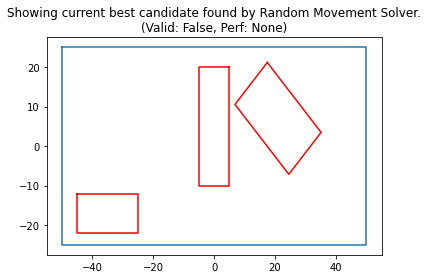

In [13]:
# Display (initial)
e.display_environment()

In [14]:
# Run solver (this take a long time, 100000 iterations!)
e.run_solver()

---
Iteration:  0
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Current perf:  123.36126117382904
Proposed mutation:  [(-35, -17), (0, 5), (3.2995187449819454, 22.37047236231438)]
New design is invalid.
---
Iteration:  1
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Current perf:  123.36126117382904
Proposed mutation:  [(-106.83402966338366, 0.86784116775409), (0, 5), (21, 7)]
New design is invalid.
---
Iteration:  2
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Current perf:  123.36126117382904
Proposed mutation:  [(-35, -17), (0, 5), (-38.44362130384089, -27.3912999101467)]
New design is invalid.
---
Iteration:  3
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
Current perf:  123.36126117382904
Proposed mutation:  [(-35, -17), (0, 5), (22.867349151632602, 12.837311142988765)]
New design is invalid.
---
Iteration:  4
Current coords:  [(-35, -17), (0, 5), (21, 7)]
Current validity:  True
C

Current validity:  True
Current perf:  70.22479120178124
Proposed mutation:  [(40.00735584614362, -31.666254728524518), (0, 5), (21, 7)]
New design is invalid.
---
Iteration:  41
Current coords:  [(20.103014424220284, -14.266278730037374), (0, 5), (21, 7)]
Current validity:  True
Current perf:  70.22479120178124
Proposed mutation:  [(20.103014424220284, -14.266278730037374), (0, 5), (9.77808509361439, -66.69524971182301)]
New design is invalid.
---
Iteration:  42
Current coords:  [(20.103014424220284, -14.266278730037374), (0, 5), (21, 7)]
Current validity:  True
Current perf:  70.22479120178124
Proposed mutation:  [(20.103014424220284, -14.266278730037374), (77.20753803507878, 49.80443684622668), (21, 7)]
New design is invalid.
---
Iteration:  43
Current coords:  [(20.103014424220284, -14.266278730037374), (0, 5), (21, 7)]
Current validity:  True
Current perf:  70.22479120178124
Proposed mutation:  [(20.103014424220284, -14.266278730037374), (-52.47867531850403, -49.662707714088015), 

Iteration:  159
Current coords:  [(20.103014424220284, -14.266278730037374), (-0.8020320352614484, -3.7354878653235364), (21, 7)]
Current validity:  True
Current perf:  68.9946841004988
Proposed mutation:  [(20.103014424220284, -14.266278730037374), (30.479535680521508, 6.138971475521245), (21, 7)]
New design is invalid.
---
Iteration:  160
Current coords:  [(20.103014424220284, -14.266278730037374), (-0.8020320352614484, -3.7354878653235364), (21, 7)]
Current validity:  True
Current perf:  68.9946841004988
Proposed mutation:  [(20.103014424220284, -14.266278730037374), (65.0789428639513, 14.252778219647999), (21, 7)]
New design is invalid.
---
Iteration:  161
Current coords:  [(20.103014424220284, -14.266278730037374), (-0.8020320352614484, -3.7354878653235364), (21, 7)]
Current validity:  True
Current perf:  68.9946841004988
Proposed mutation:  [(20.103014424220284, -14.266278730037374), (37.49334757485518, -14.779552087642719), (21, 7)]
New design is invalid.
---
Iteration:  162
Cur

Current validity:  True
Current perf:  68.9946841004988
Proposed mutation:  [(20.103014424220284, -14.266278730037374), (68.306269680499, -13.22610322923472), (21, 7)]
New design is invalid.
---
Iteration:  185
Current coords:  [(20.103014424220284, -14.266278730037374), (-0.8020320352614484, -3.7354878653235364), (21, 7)]
Current validity:  True
Current perf:  68.9946841004988
Proposed mutation:  [(20.103014424220284, -14.266278730037374), (-26.197482935024617, 70.56100397580254), (21, 7)]
New design is invalid.
---
Iteration:  186
Current coords:  [(20.103014424220284, -14.266278730037374), (-0.8020320352614484, -3.7354878653235364), (21, 7)]
Current validity:  True
Current perf:  68.9946841004988
Proposed mutation:  [(20.103014424220284, -14.266278730037374), (13.86238454223553, 34.925054778607354), (21, 7)]
New design is invalid.
---
Iteration:  187
Current coords:  [(20.103014424220284, -14.266278730037374), (-0.8020320352614484, -3.7354878653235364), (21, 7)]
Current validity:  T

Proposed mutation:  [(20.103014424220284, -14.266278730037374), (12.868714770287868, 21.075212820001983), (21, 7)]
New design is invalid.
---
Iteration:  314
Current coords:  [(20.103014424220284, -14.266278730037374), (-0.7986200572128545, -3.4208516642159), (21, 7)]
Current validity:  True
Current perf:  68.99446033972717
Proposed mutation:  [(40.05444034039973, -55.54785322194395), (-0.7986200572128545, -3.4208516642159), (21, 7)]
New design is invalid.
---
Iteration:  315
Current coords:  [(20.103014424220284, -14.266278730037374), (-0.7986200572128545, -3.4208516642159), (21, 7)]
Current validity:  True
Current perf:  68.99446033972717
Proposed mutation:  [(94.19121663792075, 14.561776558019854), (-0.7986200572128545, -3.4208516642159), (21, 7)]
New design is invalid.
---
Iteration:  316
Current coords:  [(20.103014424220284, -14.266278730037374), (-0.7986200572128545, -3.4208516642159), (21, 7)]
Current validity:  True
Current perf:  68.99446033972717
Proposed mutation:  [(-42.21

Rejected mutation, proposed design was valid but not better.
---
Iteration:  340
Current coords:  [(20.103014424220284, -14.266278730037374), (-0.7986200572128545, -3.4208516642159), (21, 7)]
Current validity:  True
Current perf:  68.99446033972717
Proposed mutation:  [(20.103014424220284, -14.266278730037374), (70.27232629326265, -42.51622996018505), (21, 7)]
New design is invalid.
---
Iteration:  341
Current coords:  [(20.103014424220284, -14.266278730037374), (-0.7986200572128545, -3.4208516642159), (21, 7)]
Current validity:  True
Current perf:  68.99446033972717
Proposed mutation:  [(-23.546823042634266, -32.42120637806571), (-0.7986200572128545, -3.4208516642159), (21, 7)]
New design is invalid.
---
Iteration:  342
Current coords:  [(20.103014424220284, -14.266278730037374), (-0.7986200572128545, -3.4208516642159), (21, 7)]
Current validity:  True
Current perf:  68.99446033972717
Proposed mutation:  [(37.764298169595165, 18.213681088718108), (-0.7986200572128545, -3.4208516642159

Current perf:  62.60943505406388
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-0.7986200572128545, -3.4208516642159), (-14.880964357126963, 2.7226051921639662)]
New design is invalid.
---
Iteration:  461
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7986200572128545, -3.4208516642159), (21, 7)]
Current validity:  True
Current perf:  62.60943505406388
Proposed mutation:  [(-51.194359807168155, 39.29429948137256), (-0.7986200572128545, -3.4208516642159), (21, 7)]
New design is invalid.
---
Iteration:  462
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7986200572128545, -3.4208516642159), (21, 7)]
Current validity:  True
Current perf:  62.60943505406388
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-0.7986200572128545, -3.4208516642159), (18.811020659177366, 8.144847404615154)]
Accepted mutation, found a better valid design.
---
Iteration:  463
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7986200572

Iteration:  491
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7986200572128545, -3.4208516642159), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.793061130916996
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (15.020398563753194, 5.780290390002254), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  492
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7986200572128545, -3.4208516642159), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.793061130916996
Proposed mutation:  [(40.13973587381094, 26.645608608845844), (-0.7986200572128545, -3.4208516642159), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  493
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7986200572128545, -3.4208516642159), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.793061130916996
Proposed 

Current validity:  True
Current perf:  61.793061130916996
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (50.3749815795071, -65.27263697838477), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  605
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7986200572128545, -3.4208516642159), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.793061130916996
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-13.594604680805798, 14.046817318802148), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  606
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7986200572128545, -3.4208516642159), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.793061130916996
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-5.128078482255501, 65.86693017895138), (18.811020659177366, 8.144847404615154)]
New design is invali

Iteration:  635
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7986200572128545, -3.4208516642159), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.793061130916996
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-0.7986200572128545, -3.4208516642159), (-3.7247690428273685, -30.662596504665345)]
New design is invalid.
---
Iteration:  636
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7986200572128545, -3.4208516642159), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.793061130916996
Proposed mutation:  [(-43.91820687658845, -38.947694325195755), (-0.7986200572128545, -3.4208516642159), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  637
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7986200572128545, -3.4208516642159), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.793061130916996
Prop

---
Iteration:  740
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7798132519548622, -3.404989368508694), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.76038029771212
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-40.61319085895445, -3.9779602715899305), (18.811020659177366, 8.144847404615154)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  741
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7798132519548622, -3.404989368508694), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.76038029771212
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (95.20309303795928, 4.549481350041189), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  742
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7798132519548622, -3.404989368508694), (18.811020659177366, 8.144847404615154)]
Current validity:  

Current perf:  61.76038029771212
Proposed mutation:  [(13.309935403920651, -12.519190832254063), (-0.7798132519548622, -3.404989368508694), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  767
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7798132519548622, -3.404989368508694), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.76038029771212
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-0.7798132519548622, -3.404989368508694), (10.130322582888207, 11.158625034452802)]
New design is invalid.
---
Iteration:  768
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.7798132519548622, -3.404989368508694), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.76038029771212
Proposed mutation:  [(25.138703823191964, -0.6461223259436562), (-0.7798132519548622, -3.404989368508694), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteratio

Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.018220022011036
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-28.551684204180404, -5.244006795911435), (18.811020659177366, 8.144847404615154)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  886
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.018220022011036
Proposed mutation:  [(-15.721013495329567, 27.149314505288157), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  887
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Curre

New design is invalid.
---
Iteration:  907
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.018220022011036
Proposed mutation:  [(-59.22437391425446, -4.502764829162827), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  908
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.018220022011036
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (36.171500872398, -24.03605508707046), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  909
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Curre

Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.018220022011036
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (20.90988595634195, -25.64443904014633)]
New design is invalid.
---
Iteration:  1024
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.018220022011036
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (22.686563781661594, 23.893123870192767)]
New design is invalid.
---
Iteration:  1025
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.018220022011036
Propos

Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (-51.676077802297534, 19.634123214945504)]
New design is invalid.
---
Iteration:  1048
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.018220022011036
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (19.54681505070343, -64.68189942364064)]
New design is invalid.
---
Iteration:  1049
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.018220022011036
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (23.085765813083086, 11.076262444233747)]
New design is invalid.
---
Iteration:  1050
Current coords:

Iteration:  1166
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.018220022011036
Proposed mutation:  [(-50.80531762164203, 18.11296701616072), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  1167
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.018220022011036
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-75.972204876179, -16.54235739215639), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  1168
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.01822002201

Iteration:  1189
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.018220022011036
Proposed mutation:  [(13.918215664392255, -1.9396478712382645), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  1190
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.018220022011036
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-66.40936447613738, 54.662874847430416), (18.811020659177366, 8.144847404615154)]
New design is invalid.
---
Iteration:  1191
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.811020659177366, 8.144847404615154)]
Current validity:  True
Current perf:  61.0182200

Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.47519984073482
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-23.122723733348916, -62.86307412441065), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  1314
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.47519984073482
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (54.59352145675567, 55.19314339504497), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  1315
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.47519984073482
Proposed mutation:  

Current perf:  60.47519984073482
Proposed mutation:  [(15.666650939536904, 7.476766629344098), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  1338
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.47519984073482
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (9.567099657884764, 1.6984531822990192)]
New design is invalid.
---
Iteration:  1339
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.47519984073482
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (4.789246397285513, -66.26888871505119)]
New design is invalid.
---
Iteratio

Current validity:  True
Current perf:  60.47519984073482
Proposed mutation:  [(13.395684769082667, -24.996231344137797), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  1454
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.47519984073482
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (70.68499502541071, -18.691330195878102), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  1455
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.47519984073482
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (8.968905648466983, -41.659620137897505), (18.29404357730233, 8.124876057555003)]
New design is i

Current validity:  True
Current perf:  60.47519984073482
Proposed mutation:  [(35.50630475958333, 8.626802126854884), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  1477
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.47519984073482
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (42.7571969316086, -81.0462112906742), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  1478
Current coords:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.47519984073482
Proposed mutation:  [(14.90855670761391, -12.414896448865793), (-0.2682075820740346, -5.2267533749698645), (51.98470874760126, -84.71698352093351)]
New design is inva

Current validity:  True
Current perf:  60.090428688646035
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (25.172398526217748, -63.81777990827865)]
New design is invalid.
---
Iteration:  1594
Current coords:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.090428688646035
Proposed mutation:  [(0.9310956300470679, -42.7795057405155), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  1595
Current coords:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.090428688646035
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (13.80730903049281, -11.965549971746817), (18.29404357730233, 8.124876057555003)]
New de

Current validity:  True
Current perf:  60.090428688646035
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (19.958930215703887, 6.941044542132358)]
New design is invalid.
---
Iteration:  1619
Current coords:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.090428688646035
Proposed mutation:  [(91.1289748027112, -34.562434626351106), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  1620
Current coords:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.090428688646035
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (-17.75621388706813, 24.133311329135367)]
New

Proposed mutation:  [(11.775728377945851, -11.366557437837288), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  1736
Current coords:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.090428688646035
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (26.128393019588124, 2.0502447733993954)]
New design is invalid.
---
Iteration:  1737
Current coords:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.090428688646035
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-17.304672412424953, 56.347727799825634), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  1738
Current coords:  

Current coords:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.090428688646035
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (4.179437634761388, 16.8934742081007)]
New design is invalid.
---
Iteration:  1760
Current coords:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.090428688646035
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (-27.133085246836213, 23.855412148439612)]
New design is invalid.
---
Iteration:  1761
Current coords:  [(16.165133811335178, -11.422218523753855), (-0.2682075820740346, -5.2267533749698645), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  60.090428688646035
Propo

Current validity:  True
Current perf:  59.44348096991665
Proposed mutation:  [(27.872360119088377, -14.275598457347137), (0.3374781629471827, -6.6373921113095715), (18.29404357730233, 8.124876057555003)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  1879
Current coords:  [(16.165133811335178, -11.422218523753855), (0.3374781629471827, -6.6373921113095715), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.44348096991665
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (0.3374781629471827, -6.6373921113095715), (63.53021631650421, -11.412951599458363)]
New design is invalid.
---
Iteration:  1880
Current coords:  [(16.165133811335178, -11.422218523753855), (0.3374781629471827, -6.6373921113095715), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.44348096991665
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-68.82537031418836, -21.969517572669645), (18.29404357

Current validity:  True
Current perf:  59.44348096991665
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-23.132515323444473, -60.119683970887316), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  1909
Current coords:  [(16.165133811335178, -11.422218523753855), (0.3374781629471827, -6.6373921113095715), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.44348096991665
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-68.52530777170331, 1.4439849364236323), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  1910
Current coords:  [(16.165133811335178, -11.422218523753855), (0.3374781629471827, -6.6373921113095715), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.44348096991665
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (0.3374781629471827, -6.6373921113095715), (5.914676837926947, 91.4572169044734)]
New design is

Current perf:  59.190118717244495
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-19.86411537660991, 3.2356612763532064), (18.29404357730233, 8.124876057555003)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2016
Current coords:  [(16.165133811335178, -11.422218523753855), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.190118717244495
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (14.41984178326221, -19.583079144619873), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2017
Current coords:  [(16.165133811335178, -11.422218523753855), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.190118717244495
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (0.48431894953213017, -6.638497655325534), (12.718130757171668, 2.75298407737792

Iteration:  2037
Current coords:  [(16.165133811335178, -11.422218523753855), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.190118717244495
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (17.25819522180095, -3.0400639530649043), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2038
Current coords:  [(16.165133811335178, -11.422218523753855), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.190118717244495
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (0.48431894953213017, -6.638497655325534), (48.69472995278859, -23.590563724044927)]
New design is invalid.
---
Iteration:  2039
Current coords:  [(16.165133811335178, -11.422218523753855), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.1901187172

---
Iteration:  2150
Current coords:  [(16.165133811335178, -11.422218523753855), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.190118717244495
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-11.090509752403952, 25.962774760632133), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2151
Current coords:  [(16.165133811335178, -11.422218523753855), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.190118717244495
Proposed mutation:  [(26.95694769555235, -56.3106490133551), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2152
Current coords:  [(16.165133811335178, -11.422218523753855), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.1901187172

Iteration:  2175
Current coords:  [(16.165133811335178, -11.422218523753855), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.190118717244495
Proposed mutation:  [(8.718485376651886, -55.254908068865504), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2176
Current coords:  [(16.165133811335178, -11.422218523753855), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.190118717244495
Proposed mutation:  [(3.7093884771654118, 25.495010644503445), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2177
Current coords:  [(16.165133811335178, -11.422218523753855), (0.48431894953213017, -6.638497655325534), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  59.1901187172444

Iteration:  2291
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.46049903374626
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (17.04740248607309, 8.812820274550134)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2292
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.46049903374626
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-6.552495070754231, 20.170334703509432), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2293
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  Tru

---
Iteration:  2312
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.46049903374626
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (-2.936424543284307, 14.371917052398691)]
New design is invalid.
---
Iteration:  2313
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.46049903374626
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (15.285259370346118, 28.13362904998945)]
New design is invalid.
---
Iteration:  2314
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.46049903374

New design is invalid.
---
Iteration:  2431
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.46049903374626
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (8.87115295146878, -19.070570772411234), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2432
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.46049903374626
Proposed mutation:  [(-12.520973613605847, 15.782273536306064), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2433
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.12487605755500

Current perf:  58.46049903374626
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (57.01056602928716, -18.3740315370587)]
New design is invalid.
---
Iteration:  2456
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.46049903374626
Proposed mutation:  [(44.54719578371906, -22.095396326888775), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2457
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.46049903374626
Proposed mutation:  [(27.202380422911673, -2.0769183708934857), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  245

New design is invalid.
---
Iteration:  2567
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.46049903374626
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (31.81554837224675, 7.27320347406951), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2568
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.46049903374626
Proposed mutation:  [(44.968252344730246, 20.16420418956088), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2569
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf: 

Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.46049903374626
Proposed mutation:  [(16.165133811335178, -11.422218523753855), (-33.675776735492036, -4.174048998814116), (18.29404357730233, 8.124876057555003)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2590
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.46049903374626
Proposed mutation:  [(-3.6481882218819237, -8.15464802404117), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2591
Current coords:  [(16.165133811335178, -11.422218523753855), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  

Current perf:  58.41401609764053
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (4.8233579208732795, -29.322570219755253)]
New design is invalid.
---
Iteration:  2708
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.41401609764053
Proposed mutation:  [(30.74674044489339, 9.905100839665202), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2709
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.41401609764053
Proposed mutation:  [(12.548201869000863, -13.508771581200367), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  27

Proposed mutation:  [(-23.9111784509918, 10.238838902636896), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2731
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.41401609764053
Proposed mutation:  [(23.41187201326021, -4.385189695016165), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
New design is invalid.
---
Iteration:  2732
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.29404357730233, 8.124876057555003)]
Current validity:  True
Current perf:  58.41401609764053
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.315454004817067, 7.983150848695383)]
Accepted mutation, found a better valid

Current validity:  True
Current perf:  58.20467047942202
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (20.40671164323071, 9.525349462751464)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2851
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.315454004817067, 7.983150848695383)]
Current validity:  True
Current perf:  58.20467047942202
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (12.211523507195896, 5.0750543117309315), (18.315454004817067, 7.983150848695383)]
New design is invalid.
---
Iteration:  2852
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.315454004817067, 7.983150848695383)]
Current validity:  True
Current perf:  58.20467047942202
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (-9.355182858611

New design is invalid.
---
Iteration:  2872
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.315454004817067, 7.983150848695383)]
Current validity:  True
Current perf:  58.20467047942202
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (6.783789806752141, -13.225016704992393)]
New design is invalid.
---
Iteration:  2873
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.315454004817067, 7.983150848695383)]
Current validity:  True
Current perf:  58.20467047942202
Proposed mutation:  [(36.13892314550057, -38.475943621622264), (0.7492680990638059, -5.762479112408909), (18.315454004817067, 7.983150848695383)]
New design is invalid.
---
Iteration:  2874
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.315454004817067, 7.983150848695383)]
Current validity:  True
Curr

Current perf:  58.20467047942202
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (24.758733538518037, -0.09314539221512597)]
New design is invalid.
---
Iteration:  2990
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.315454004817067, 7.983150848695383)]
Current validity:  True
Current perf:  58.20467047942202
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (-0.6235105071722498, -6.83403171054239), (18.315454004817067, 7.983150848695383)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  2991
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.315454004817067, 7.983150848695383)]
Current validity:  True
Current perf:  58.20467047942202
Proposed mutation:  [(43.21250319065089, -19.281319378547185), (0.7492680990638059, -5.762479112408909), (18.315454004817067, 7.98315084869538

Current validity:  True
Current perf:  58.20467047942202
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (9.259049586080218, -22.85138247737288)]
New design is invalid.
---
Iteration:  3014
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.315454004817067, 7.983150848695383)]
Current validity:  True
Current perf:  58.20467047942202
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (2.4067426323288403, -26.049561537615425), (18.315454004817067, 7.983150848695383)]
New design is invalid.
---
Iteration:  3015
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.315454004817067, 7.983150848695383)]
Current validity:  True
Current perf:  58.20467047942202
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (27.01558817057882, 24.849054546175985)]
New design 

Current perf:  57.945347995863145
Proposed mutation:  [(16.05819604810988, 21.641709501809206), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3125
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(20.40199484844767, -31.988729263040284), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3126
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (41.49637514579511, 24.062038391788292)]
New design is invalid.
---
Iteration

Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.2039886173485388, -2.379990006555854), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3147
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (10.95574751035521, 17.896562157704988), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3148
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.721382606292035, -11.037948683588972), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3149
Current coords:  [(16.15

Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (19.828735531611546, 5.12648444293764)]
New design is invalid.
---
Iteration:  3264
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (-14.410852565419823, 26.23797546749132)]
New design is invalid.
---
Iteration:  3265
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(27.026345173216406, 15.810716710089924), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3266
Current coords:  [(16.15

Iteration:  3285
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (28.686261014897116, -13.171957058192328), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3286
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (-21.891100428113837, 16.72895313134616)]
New design is invalid.
---
Iteration:  3287
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995

Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (37.74503068930447, 34.066812891882044)]
New design is invalid.
---
Iteration:  3404
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (13.221467005212816, 12.685494804673791)]
New design is invalid.
---
Iteration:  3405
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(28.913871014389166, 8.613282808642214), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
New design

New design is invalid.
---
Iteration:  3430
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(31.505122836146082, 31.8430666394779), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3431
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (19.42146547829754, 10.07826558563066)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  3432
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.9641576175

Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (16.450230487075398, -3.499187996876348), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3552
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (28.592825183710474, -10.389981298879835), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3553
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (32.85342887769972, 16.405175279766716)]
New desi

Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (3.8942965012576205, -1.703472967076114), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3583
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(25.55228040541406, -7.184630659849044), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3584
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (14.686498325809012, -0.9473402161406188), (18.058436335378204, 7.964157617536396)]
New design

Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (32.978411389213804, 38.862756307531306)]
New design is invalid.
---
Iteration:  3692
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (64.91199140693797, -2.281614307258887)]
New design is invalid.
---
Iteration:  3693
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(17.708731516530538, -12.468090844633462), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Rejected mutation, proposed design was valid but not better.
---
I

Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (-20.251500881778185, 13.537945320961551)]
New design is invalid.
---
Iteration:  3714
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(-2.142003322794114, 2.1014317678783314), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3715
Current coords:  [(16.157976791671178, -11.391919995928237), (0.7492680990638059, -5.762479112408909), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.945347995863145
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (19.18287161479899, -4.978769741051471), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3716
Current coords:  [(16.1

Proposed mutation:  [(28.779014874598687, 5.40294427888124), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3834
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation:  [(51.757614929913416, -25.322740813460015), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3835
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (12.541061615069031, -50.69433541768446), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3836
Current coords:  [(16.15797679

Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation:  [(41.5850205911224, -3.648487257580114), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3857
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (-16.859036893409346, -6.5072620673791866)]
New design is invalid.
---
Iteration:  3858
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation

New design is invalid.
---
Iteration:  3973
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (-8.66616681847215, -14.525404816127885)]
New design is invalid.
---
Iteration:  3974
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (-15.713126361864902, 39.020056709674904)]
New design is invalid.
---
Iteration:  3975
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Curr

Current perf:  57.638512860050724
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (0.9825802567532733, 6.818055867282026)]
New design is invalid.
---
Iteration:  3996
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.6601820636858691, 25.47654413641274), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  3997
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (-12.428148905312195, 6.515274748986246), (18.058436335378204, 7.964157617536396)]
Rejected mutation, proposed design wa

Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation:  [(15.681701731810003, -10.012323292688224), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  4115
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (-6.372806784723792, 3.014007742378392)]
New design is invalid.
---
Iteration:  4116
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation

Rejected mutation, proposed design was valid but not better.
---
Iteration:  4138
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (10.93601482931841, 3.8661309119746043)]
New design is invalid.
---
Iteration:  4139
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.638512860050724
Proposed mutation:  [(30.292559300287486, -4.382762850481044), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  4140
Current coords:  [(16.157976791671178, -11.391919995928237), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536

New design is invalid.
---
Iteration:  4255
Current coords:  [(16.034719670374248, -11.436773099385167), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.59531498744099
Proposed mutation:  [(16.034719670374248, -11.436773099385167), (-1.7689387024264833, -13.114367249201376), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  4256
Current coords:  [(16.034719670374248, -11.436773099385167), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.59531498744099
Proposed mutation:  [(16.034719670374248, -11.436773099385167), (6.189648086959253, 6.989579127887791), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  4257
Current coords:  [(16.034719670374248, -11.436773099385167), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current

Current perf:  57.59531498744099
Proposed mutation:  [(16.034719670374248, -11.436773099385167), (-5.6661379181254805, 1.7830875284684042), (18.058436335378204, 7.964157617536396)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4277
Current coords:  [(16.034719670374248, -11.436773099385167), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.59531498744099
Proposed mutation:  [(16.034719670374248, -11.436773099385167), (8.65644614839772, 1.517255552780929), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  4278
Current coords:  [(16.034719670374248, -11.436773099385167), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.59531498744099
Proposed mutation:  [(28.98620737637419, -29.072034616009326), (0.941798280113533, -5.848933357781418), (18.058436335378204, 7.964157617536396)]
New 

Current coords:  [(16.034719670374248, -11.436773099385167), (0.9451446192668512, -5.857529800289526), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.59198990042609
Proposed mutation:  [(12.897893097971108, -13.084244407980155), (0.9451446192668512, -5.857529800289526), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  4395
Current coords:  [(16.034719670374248, -11.436773099385167), (0.9451446192668512, -5.857529800289526), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.59198990042609
Proposed mutation:  [(16.034719670374248, -11.436773099385167), (0.9451446192668512, -5.857529800289526), (25.15173905163102, 12.494345203558773)]
New design is invalid.
---
Iteration:  4396
Current coords:  [(16.034719670374248, -11.436773099385167), (0.9451446192668512, -5.857529800289526), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.59198990042609
Proposed mutati

New design is invalid.
---
Iteration:  4416
Current coords:  [(16.034719670374248, -11.436773099385167), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.588115528135354
Proposed mutation:  [(39.095125834262014, -19.340095781556716), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4417
Current coords:  [(16.034719670374248, -11.436773099385167), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.588115528135354
Proposed mutation:  [(16.034719670374248, -11.436773099385167), (1.659901846375359, 17.306558919030593), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  4418
Current coords:  [(16.034719670374248, -11.436773099385167), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.96415761753

New design is invalid.
---
Iteration:  4532
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.231814320107745
Proposed mutation:  [(12.415106882894586, -12.792556894619048), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  4533
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.231814320107745
Proposed mutation:  [(25.926842481824774, 3.160579115629048), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  4534
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf

Current perf:  57.231814320107745
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (41.4634860385066, -0.4238338022136938)]
New design is invalid.
---
Iteration:  4560
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.231814320107745
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (22.955777840198927, 5.731360346511472)]
New design is invalid.
---
Iteration:  4561
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.231814320107745
Proposed mutation:  [(15.703405832051358, -3.993271391507105), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  4562

Current perf:  57.231814320107745
Proposed mutation:  [(34.35457757914939, -28.146218682357905), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  4676
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.231814320107745
Proposed mutation:  [(16.66176735965432, -13.738098675430095), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4677
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.231814320107745
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-4.021910440214114, -13.031592215601787), (18.058436335378204, 7.964157617536396)]
New

---
Iteration:  4696
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.231814320107745
Proposed mutation:  [(18.929485103481873, -12.498971202191525), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4697
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Current validity:  True
Current perf:  57.231814320107745
Proposed mutation:  [(32.97613819335234, 3.8995633819873774), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
New design is invalid.
---
Iteration:  4698
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.058436335378204, 7.964157617536396)]
Current validity:  Tr

Current validity:  True
Current perf:  57.19963726733653
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (5.3947151426552304, -8.435003438667103), (18.004205515348566, 7.97366789614669)]
New design is invalid.
---
Iteration:  4807
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.004205515348566, 7.97366789614669)]
Current validity:  True
Current perf:  57.19963726733653
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (3.3603949662682764, -7.765339560814173), (18.004205515348566, 7.97366789614669)]
New design is invalid.
---
Iteration:  4808
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.004205515348566, 7.97366789614669)]
Current validity:  True
Current perf:  57.19963726733653
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-14.244033585038947, -10.04625082506345), (18.004205515348566, 7.97366789614669)]
New design is invalid.


Current perf:  57.19963726733653
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-6.528958943838724, -27.601819085903614), (18.004205515348566, 7.97366789614669)]
New design is invalid.
---
Iteration:  4830
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.004205515348566, 7.97366789614669)]
Current validity:  True
Current perf:  57.19963726733653
Proposed mutation:  [(17.8269454368692, -19.452671690740058), (0.972210506409587, -6.005473232487047), (18.004205515348566, 7.97366789614669)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4831
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.004205515348566, 7.97366789614669)]
Current validity:  True
Current perf:  57.19963726733653
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (7.14503225941141, -21.305777839897058), (18.004205515348566, 7.97366789614669)]
New design i

Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(18.978325056142967, -4.677443690812506), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  4948
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(19.210991681027842, -17.596716368993466), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4949
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (33.07608700252616, -7.3

New design is invalid.
---
Iteration:  4969
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (22.548941497934717, 15.556403236226148)]
New design is invalid.
---
Iteration:  4970
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(23.84899831457271, -14.145758912741805), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  4971
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]

Iteration:  5081
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.918874925963998, -20.054176093381503), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5082
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (37.58582336599501, 14.46686242878883)]
New design is invalid.
---
Iteration:  5083
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed

Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(27.775905419112064, -32.954848962820954), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5105
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (4.497741990669688, -7.739229947524523)]
New design is invalid.
---
Iteration:  5106
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (23.00190584294058, 18.96321241085918)]
New design is invalid.

Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (15.83375459000033, 13.745214448055362), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5219
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-3.4483364993463956, -11.412450899275141), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5220
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (14.328484427636683, -0.6609972835378084)]
New design is invalid.
---
Iteration:  52

Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (30.40506467471571, 20.38142279685644)]
New design is invalid.
---
Iteration:  5242
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(21.6658270662421, -22.879562423396322), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5243
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(15.706837251307883, -13.082449996500735), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5244
Cur

Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(12.551562952869995, -9.195716736061266), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5362
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.651568202530537, 15.551018980297858)]
New design is invalid.
---
Iteration:  5363
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(8.80458717773369, 4.2140464337045795), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
New design is invalid.


Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (2.9914998807929845, 23.901067769209966)]
New design is invalid.
---
Iteration:  5384
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(14.069473011805007, -4.816822776212484), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5385
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16

Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-17.00887520345925, 10.163754190358391), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5505
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(11.412308207649236, -5.535863304371098), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5506
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (15.538584310648655, -17.384316424320446), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5507

Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (5.775076194080303, -15.019926763217805), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5528
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(20.499306737324787, -15.268239551839205), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5529
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (18.723419769319428, 17

Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(23.216964734302408, -4.381594308855178), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5645
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (-4.713526842427964, 15.664490665481425)]
New design is invalid.
---
Iteration:  5646
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16

Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-5.414816383435314, -1.2209666752785706), (17.831045482769536, 7.998609043870715)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5669
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(15.215087865059699, -13.305773508303963), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5670
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (20.41026598114732, 6.885463288999935)]
New design is invalid.
---
Iteration:  

Proposed mutation:  [(22.543351147196603, -13.765053101893834), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  5782
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (19.140201685487973, -3.8216606363626333)]
New design is invalid.
---
Iteration:  5783
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (16.5540326949793, -9.96128814506299), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5

Current perf:  57.08960674821954
Proposed mutation:  [(15.284664337319791, -8.898050465681324), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5806
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (6.5256935045101265, -30.34092512768388), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5807
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
Current validity:  True
Current perf:  57.08960674821954
Proposed mutation:  [(-0.7139005900166389, -1.5849069975964536), (0.972210506409587, -6.005473232487047), (17.831045482769536, 7.998609043870715)]
New design is invalid.
---
Iteration:  5808

New design is invalid.
---
Iteration:  5923
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (38.60458204166662, 10.747373376218187)]
New design is invalid.
---
Iteration:  5924
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (11.395900265063078, -24.185973213379086), (17.804790888415063, 7.999217076370498)]
New design is invalid.
---
Iteration:  5925
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf

Current perf:  57.06793955158966
Proposed mutation:  [(29.3078531537599, -0.23678909473797916), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
New design is invalid.
---
Iteration:  5945
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(11.062827495404932, 8.945501016617694), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
New design is invalid.
---
Iteration:  5946
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (19.41373912475475, 10.857707218506608)]
Rejected mutation, proposed design was valid bu

Current perf:  57.06793955158966
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-5.7660271208968314, -9.84517960307118), (17.804790888415063, 7.999217076370498)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6063
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(15.626936668486554, -15.871692251784218), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
New design is invalid.
---
Iteration:  6064
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.6765204788494943, 1.1678689784734786), (17.804790888415063, 7.999217076370498)]
New d

Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.116818345670318, 6.703413582035484)]
New design is invalid.
---
Iteration:  6087
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (20.588727726771378, 19.311019918715463)]
New design is invalid.
---
Iteration:  6088
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (24.121487571932352, 10.401206749566725)]
Rejected mutation, p

Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-2.8844867698646377, -6.313863613887796), (17.804790888415063, 7.999217076370498)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6203
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(24.522841740283877, -12.711381874302413), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6204
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(20.396852664320104, -11.206105884170135), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]

Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.60827600706446, -2.9734639864919683), (17.804790888415063, 7.999217076370498)]
New design is invalid.
---
Iteration:  6231
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(21.6669255010475, -8.198913490665504), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
New design is invalid.
---
Iteration:  6232
Current coords:  [(16.00327050165481, -11.188138617874575), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  57.06793955158966
Proposed mutation:  [(11.549247216377701, -9.91834654341693), (0.972210506409587, -6.005473232487047), (17.804790888415063, 7.999217076370498)]
New design is invalid.
--

Iteration:  6332
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  56.98809354092786
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-2.697826569136244, 1.0788514838689123), (17.804790888415063, 7.999217076370498)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6333
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  56.98809354092786
Proposed mutation:  [(17.926979207551597, -13.330837810295348), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6334
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.9

Iteration:  6355
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  56.98809354092786
Proposed mutation:  [(11.743689115151003, -10.840181436565407), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
New design is invalid.
---
Iteration:  6356
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  56.98809354092786
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-2.547837770962543, -2.0975153783918548), (17.804790888415063, 7.999217076370498)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6357
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
Current validity:  T

Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  56.98809354092786
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (6.638475486288943, -4.179910940967248), (17.804790888415063, 7.999217076370498)]
New design is invalid.
---
Iteration:  6474
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  56.98809354092786
Proposed mutation:  [(20.09157783392142, -6.516629128853013), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
New design is invalid.
---
Iteration:  6475
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  56.98809354092786
Proposed mutation:  [(

Current perf:  56.98809354092786
Proposed mutation:  [(14.461880357921022, -8.847755914625683), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
New design is invalid.
---
Iteration:  6498
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  56.98809354092786
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.772216955922726, 9.020764580802162)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  6499
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.804790888415063, 7.999217076370498)]
Current validity:  True
Current perf:  56.98809354092786
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (8.751629454091129, -13.132311590299071), (17.804790888415063, 7.999217076370498)]
New

Rejected mutation, proposed design was valid but not better.
---
Iteration:  6617
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (9.717791779040002, 9.457017626893894)]
New design is invalid.
---
Iteration:  6618
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (0.22837667690262697, -3.4128686143727975), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  6619
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Cu

Current perf:  56.98080048211034
Proposed mutation:  [(24.627726560971247, -7.385047907828869), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  6643
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(9.701846447192018, -10.18426060818903), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  6644
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-6.893708224715407, -15.094335602257559), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  6645
Current

Iteration:  6754
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (23.74301036562737, 13.078656519932302)]
New design is invalid.
---
Iteration:  6755
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-9.47832531670661, -11.378541944252214), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  6756
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mu

Iteration:  6778
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(4.616654239495858, -15.261651837027973), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  6779
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(17.224206100894442, -21.90939727630946), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  6780
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed muta

Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (6.286601076279561, 0.14445799701815965), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  6896
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (18.238195561543005, 7.914718821342934)]
New design is invalid.
---
Iteration:  6897
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(18.243404462809746, -9.928548464609285), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  6898
Curre

Rejected mutation, proposed design was valid but not better.
---
Iteration:  6917
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(7.195000191854934, -6.470733792080834), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  6918
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.69578285319016, 7.881372741890801)]
New design is invalid.
---
Iteration:  6919
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Curre

Iteration:  7038
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (18.801651068926237, -4.351774946121108)]
New design is invalid.
---
Iteration:  7039
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(15.552666627407003, -11.108525094663637), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  7040
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed 

Iteration:  7059
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.715178021044874, 7.238916387130607)]
New design is invalid.
---
Iteration:  7060
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (2.7370025097742507, -7.441111269662161), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  7061
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mu

Proposed mutation:  [(16.00327050165481, -11.188138617874575), (9.339695143046997, -3.2335226211998624), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  7176
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (3.203554267988612, -6.753155286470588), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  7177
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(15.41926243706878, -21.156348547807376), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  7178
Current coords:  [(16.00327050165481, -11

Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0613574192396515, -5.747375673982485), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  7201
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.1442040173175372, 5.163511277385857), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  7202
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.3916817769733767, -3.984649157111132), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  7203
Current 

Rejected mutation, proposed design was valid but not better.
---
Iteration:  7320
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(15.806189221826648, -10.867056741551627), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  7321
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (9.25149097925523, 7.392980263153564)]
New design is invalid.
---
Iteration:  7322
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Curr

Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-6.16692233821049, -8.548651933639654), (17.8021137439248, 7.996167537269998)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7345
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (2.1035137936810333, -5.896925147527173), (17.8021137439248, 7.996167537269998)]
New design is invalid.
---
Iteration:  7346
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.996167537269998)]
Current validity:  True
Current perf:  56.98080048211034
Proposed mutation:  [(18.780516534590625, -21.196582967642524), (1.0012449012097941, -5.908306263704698), (17.8021137439248, 7.9961675

Current validity:  True
Current perf:  56.957798142323284
Proposed mutation:  [(14.45296009319507, -15.511712520093566), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  7463
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.957798142323284
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.9809658269932648, -4.920553208702959), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  7464
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.957798142323284
Proposed mutation:  [(15.790542536070573, -2.453035544123953), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
New design is invalid.
-

Iteration:  7487
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.957798142323284
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.6777887443911035, 6.312567150693192), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  7488
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.957798142323284
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (7.663420841175942, 3.051133883146848)]
New design is invalid.
---
Iteration:  7489
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.957798142323284
Proposed m

Current perf:  56.957798142323284
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (16.117689272378367, 20.101835439357025)]
New design is invalid.
---
Iteration:  7602
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.957798142323284
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (21.179568535955365, 7.335232441349252)]
New design is invalid.
---
Iteration:  7603
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.957798142323284
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (-1.2870302438086876, -1.8322809296940132), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  76

Iteration:  7626
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.957798142323284
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (10.515231252052734, 5.3253378234606785)]
New design is invalid.
---
Iteration:  7627
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.957798142323284
Proposed mutation:  [(16.13375282120997, -11.069991202379656), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  7628
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.957798142323284
Propose

Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.957798142323284
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (19.035994811555796, 8.235760325646252)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7740
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.957798142323284
Proposed mutation:  [(16.00327050165481, -11.188138617874575), (2.4618537715983564, -11.646614940813269), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  7741
Current coords:  [(16.00327050165481, -11.188138617874575), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95

Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.67575396476047, 8.249029385965306)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7766
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (13.886880690172866, -1.3847906193263544)]
New design is invalid.
---
Iteration:  7767
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (23.13884615200908

Iteration:  7888
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (18.2706707295287, 4.518730146070134)]
New design is invalid.
---
Iteration:  7889
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.401949718035336, -2.485972395054233)]
New design is invalid.
---
Iteration:  7890
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Propo

Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.67520876851073, 8.097144918047361)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  7910
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.3960891063682457, -11.855556023173683), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  7911
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(19.01297639225728, -12.235918362146512), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was v

Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.37712500098164, 5.451177740534128)]
New design is invalid.
---
Iteration:  8033
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.2487933788444117, -4.221011255249451), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  8034
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(13

Iteration:  8056
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(15.68823726835015, -11.334076788306808), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  8057
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (18.110153465808455, 8.288477454529954)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8058
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Cu

Proposed mutation:  [(12.365928163153411, -11.103852302874856), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  8176
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (-1.0392369720301717, -2.025472938831271), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  8177
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (-1.595671646515323, -7.067895739220558), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8

Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (14.345130030822093, 12.68750293478114)]
New design is invalid.
---
Iteration:  8202
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (18.36537841915846, 9.112991772015024)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8203
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (2.2959125475824496, -6.115202416567114), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration: 

---
Iteration:  8312
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(13.46239256941949, -5.498690130582152), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  8313
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (20.656204615773635, 7.171553092449186)]
New design is invalid.
---
Iteration:  8314
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Prop

Iteration:  8334
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (0.7978245181214358, -6.637792460711402), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8335
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.67272678457386, -13.01598918224302), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8336
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977

New design is invalid.
---
Iteration:  8450
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (-0.41212273676938205, -7.026028518483009), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8451
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.647927815158553, 9.191434742946267)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8452
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698

Proposed mutation:  [(16.344796953505778, -9.052818202156358), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  8478
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (15.304472102636389, 3.282350420961392)]
New design is invalid.
---
Iteration:  8479
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(17.674211816438028, -10.198928324803301), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  8480
Current coords:  [(16.011062397091

Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (-4.7489271350844895, -5.994637380642051), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8597
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(20.24547593064419, -15.320762311878946), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8598
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (11.83327

Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (-2.6038724281707775, -4.233353750428092), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8618
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (18.43298433905639, 7.303202733100588)]
New design is invalid.
---
Iteration:  8619
Current coords:  [(16.011062397091674, -11.181086038635096), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.95508285134967
Proposed mutation:  [(21.32887117384906, -8.95617100175495), (1.0012449012097941, -5.908306263704698), (17.74570684824244, 8.01182977889815)]
New desig

Current coords:  [(16.006424773728263, -11.17153376476756), (1.0047714700570713, -5.907866325383725), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.9322727805361
Proposed mutation:  [(16.006424773728263, -11.17153376476756), (0.27081888619315386, -1.3000032459926238), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  8732
Current coords:  [(16.006424773728263, -11.17153376476756), (1.0047714700570713, -5.907866325383725), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.9322727805361
Proposed mutation:  [(16.006424773728263, -11.17153376476756), (1.0047714700570713, -5.907866325383725), (13.536834614833907, 10.027309848691017)]
New design is invalid.
---
Iteration:  8733
Current coords:  [(16.006424773728263, -11.17153376476756), (1.0047714700570713, -5.907866325383725), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.9322727805361
Proposed mutation:  [(16.006

Current validity:  True
Current perf:  56.9322727805361
Proposed mutation:  [(14.400538196063295, -10.200662393775035), (1.0047714700570713, -5.907866325383725), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  8754
Current coords:  [(16.006424773728263, -11.17153376476756), (1.0047714700570713, -5.907866325383725), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.9322727805361
Proposed mutation:  [(16.006424773728263, -11.17153376476756), (0.0576254978593872, -3.417226753745721), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  8755
Current coords:  [(16.006424773728263, -11.17153376476756), (1.0047714700570713, -5.907866325383725), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.9322727805361
Proposed mutation:  [(16.006424773728263, -11.17153376476756), (-2.3586592841451126, -6.411956067637597), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed 

Iteration:  8859
Current coords:  [(16.006424773728263, -11.17153376476756), (1.0047714700570713, -5.907866325383725), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.9322727805361
Proposed mutation:  [(16.99448098186346, -11.812266718314762), (1.0047714700570713, -5.907866325383725), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  8860
Current coords:  [(16.006424773728263, -11.17153376476756), (1.0047714700570713, -5.907866325383725), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.9322727805361
Proposed mutation:  [(14.649192061072181, -12.593751068754024), (1.0047714700570713, -5.907866325383725), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  8861
Current coords:  [(16.006424773728263, -11.17153376476756), (1.0047714700570713, -5.907866325383725), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current p

Iteration:  8883
Current coords:  [(16.006424773728263, -11.17153376476756), (1.0061978116413628, -5.910000189824702), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.93048814036188
Proposed mutation:  [(16.006424773728263, -11.17153376476756), (1.0061978116413628, -5.910000189824702), (18.98511425071159, 11.346204455207484)]
New design is invalid.
---
Iteration:  8884
Current coords:  [(16.006424773728263, -11.17153376476756), (1.0061978116413628, -5.910000189824702), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.93048814036188
Proposed mutation:  [(16.006424773728263, -11.17153376476756), (1.0061978116413628, -5.910000189824702), (16.06109254029944, 6.7695382299359395)]
New design is invalid.
---
Iteration:  8885
Current coords:  [(16.006424773728263, -11.17153376476756), (1.0061978116413628, -5.910000189824702), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.93048814036188
Proposed 

Proposed mutation:  [(12.480257755988871, -13.986040506591195), (1.0061978116413628, -5.910000189824702), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  8998
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0061978116413628, -5.910000189824702), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92868880563507
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.0061978116413628, -5.910000189824702), (18.266061255775796, 5.818469890972106)]
New design is invalid.
---
Iteration:  8999
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0061978116413628, -5.910000189824702), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92868880563507
Proposed mutation:  [(15.772086950323391, -10.783405087310031), (1.0061978116413628, -5.910000189824702), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9000
Current coords:  [(16.01194651881

Current coords:  [(16.011946518814643, -11.166625189851656), (1.0061978116413628, -5.910000189824702), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92868880563507
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.2233411294395613, -5.549737402163343), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9021
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0061978116413628, -5.910000189824702), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92868880563507
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (0.8063193700797466, -7.016933917534931), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9022
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0061978116413628, -5.910000189824702), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92

Proposed mutation:  [(16.011946518814643, -11.166625189851656), (0.7969326103466358, -6.951694655143545), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9136
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(18.43647821741724, -8.322317529468627), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9137
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (16.97798855658091, 13.721670378910403)]
New design is invalid.
---
Iteration:  91

Proposed mutation:  [(16.011946518814643, -11.166625189851656), (6.195543523520013, -4.004689628279783), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9160
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (18.6877858888175, 13.763007237530587)]
New design is invalid.
---
Iteration:  9161
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(15.389883107449489, -5.353854804075094), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9162
Current coords:  [(16.01194651881464

Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (13.737213085230527, 5.459711371285685)]
New design is invalid.
---
Iteration:  9269
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (-2.8268827050013394, -3.1442004199352063), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9270
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (14.543579329670061, 7.599396360729111)]
New design is invalid.
---
Iteratio

New design is invalid.
---
Iteration:  9294
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(20.422946124818782, -13.70105520917469), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9295
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(12.212827794082976, -6.808141987061566), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9296
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Cu

Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (16.706756223934157, 8.89842657011833)]
New design is invalid.
---
Iteration:  9411
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(15.676376406438095, -10.429550273806697), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9412
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(17.462468357400876, -13.561336209043777), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9

Proposed mutation:  [(17.639299009356147, -9.731442641415036), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9434
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (19.503078870499817, 5.830380914807548)]
New design is invalid.
---
Iteration:  9435
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (0.8269883903371313, -5.244816863576239), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9436
Current coords:  [(16.011946518814

Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(17.93358103771035, -11.21263753072611), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9543
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(10.574657766310196, -9.60615230063464), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9544
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.927385

Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (4.295877093344258, -7.839560639633882), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9567
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (0.8737382120514163, -6.099538892157471), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9568
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (18.66623718284154, 8.158957374431445)]
Rejected

Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.1085367270441515, -5.6966522823640675), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9686
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.014169715615807, 8.331924626885339)]
New design is invalid.
---
Iteration:  9687
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(12.604905358447903, -6.108243180909432), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9688
Current coords:  [(16.01194651881

Rejected mutation, proposed design was valid but not better.
---
Iteration:  9708
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (0.8705150742942729, -0.464889063129867), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9709
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (-1.3588883524957787, -0.4536010603398619), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9710
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)

Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.844577607935808, 7.688760522251427)]
New design is invalid.
---
Iteration:  9819
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.443378132812004, 7.817193448997737)]
New design is invalid.
---
Iteration:  9820
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [

Proposed mutation:  [(16.011946518814643, -11.166625189851656), (-1.5268918469867079, -0.8135866398700982), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9842
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(14.658620648593327, -6.106600998632428), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9843
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(12.774235002953413, -9.61062835553381), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  984

Iteration:  9956
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (-0.02034904213197697, -8.916219577464334), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid but not better.
---
Iteration:  9957
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (3.876918094186458, -1.7801609392282796), (17.74570684824244, 8.01182977889815)]
New design is invalid.
---
Iteration:  9958
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
C

Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (15.048220457238322, 4.666013517040929)]
New design is invalid.
---
Iteration:  9979
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (22.07539995102832, 6.381424323035518)]
New design is invalid.
---
Iteration:  9980
Current coords:  [(16.011946518814643, -11.166625189851656), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Current validity:  True
Current perf:  56.92738500596259
Proposed mutation:  [(19.378772593820578, -11.21358096187007), (1.0077942513494396, -5.914628550275056), (17.74570684824244, 8.01182977889815)]
Rejected mutation, proposed design was valid

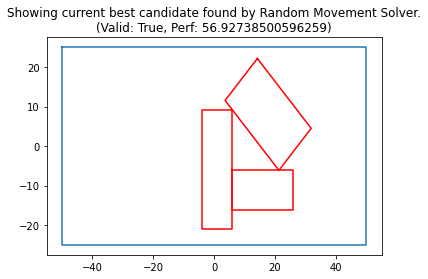

In [15]:
# Display (after running solver)
e.display_environment()

### What's next?

- In terms of OOP and optimization design
  - New shapes for buildings and environments? (Right now, only rectangular)
  - New constraints and objective/performance functions? (Right now, very simplistic)
- What other mutations can be considered?
  - Would it make sense to mutate by rotating the buildings randomly, on top of the centroids moving?
  - On top of the previous mutations, would it make sense to mutate by swapping the position of two buildings, sometimes?
  - Could the current mutation lead to a solver "stuck" with an inefficient solution as the current best candidate?  How to detect it and possibly avoid it? Should we keep track of multiple candidates and not just one?
- Can we use a smarter mutation procedure than just moving randomly? 
  - Lots of rejects when randomly mutating, this is a waste of time for the solver.
  - Could we come up with a procedure that tells us an "approximate good" direction in which we could move?
  - E.g., maybe moving the buildings in a few directions, with a small step and compute an approximate gradient for the objective/performance function that we could use to improve our chances of producing a better candidate on each iteration?
- How to decide on a number of iterations?
  - Can we stop early if we feel we have found a good candidate?
  - Can we add more iterations if we detect there is still room for improvement?